In [ ]:
from datetime import datetime
from faker import Faker
import random
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
sns.set_palette('rocket')

# Класс Пассажир

In [ ]:
class Passenger:
    """
    Класс для хранения информации о пассажирах авиакомпании.
    - flight_number: str - номер рейса
    - flight_date: datetime - дата рейса
    - name: str - ФИО пассажира
    - seat_number: str - номер места в самолете
    """

    def __init__(self, name, flight_date, flight_number, seat_number) -> None:
        self.flight_number = flight_number
        self.flight_date = flight_date
        self.name = name
        self.seat_number = seat_number

    def __str__(self) -> str:
        return f"'ФИО пассажира: {self.name}\nДата рейса: {self.flight_date}\nНомер рейса: {self.flight_number}\nНомер места: {self.seat_number}'"

    def __eq__(self, passenger: "Passenger") -> bool:
        if not isinstance(passenger, Passenger):
            raise TypeError(f"Сравнение с {type(passenger).__name__} не поддерживается")

        return all(
            [
                self.flight_date == passenger.flight_date,
                self.flight_number == passenger.flight_number,
                self.name == passenger.name,
                self.seat_number == passenger.seat_number
            ]
        )

    def __ne__(self, passenger: "Passenger") -> bool:
        return not self.__eq__(passenger)

    def __lt__(self, passenger: "Passenger") -> bool:
        if not isinstance(passenger, Passenger):
            raise TypeError(f"Сравнение с {type(passenger).__name__} не поддерживается")

        if self.flight_date != passenger.flight_date:
            return self.flight_date < passenger.flight_date
        elif self.flight_number != passenger.flight_number:
            return self.flight_number < passenger.flight_number
        elif self.name != passenger.name:
            return self.name < passenger.name
        else:
            return self.seat_number < passenger.seat_number

    def __le__(self, passenger: "Passenger") -> bool:
        return self.__lt__(passenger) or self.__eq__(passenger)

    def __ge__(self, passenger: "Passenger") -> bool:
        return not self.__lt__(passenger)

    def __gt__(self, passenger: "Passenger") -> bool:
        return not self.__lt__(passenger) and not self.__eq__(passenger)

    def show_info(self):
        print(f'ФИО пассажира: {self.name}\nДата рейса: {self.flight_date}\nНомер рейса: {self.flight_number}\nНомер места: {self.seat_number}')

    def get_data_as_list(self) -> list:
        return [self.name, self.flight_date, self.flight_number, self.seat_number]

# Генерация данных

In [ ]:
def generate_passenger():
    fake = Faker('ru_RU')
    return Passenger(
        name = f"{fake.last_name_male()} {fake.first_name_male()} {fake.middle_name_male()}",
        flight_number = f'{fake.random_uppercase_letter()}{fake.random_uppercase_letter()} {fake.random_int(100, 9999)}',
        flight_date = fake.date_between(start_date="-1y"),
        seat_number = f"{random.randint(1, 20)}{random.choice('ABCD')}")

In [ ]:
def get_list_of_passengers(n = 10):
    passengers = []
    for _ in range(n):
        passengers.append(generate_passenger())
    return passengers

In [ ]:
for n in [100, 500, 1000, 5000, 10000, 50000, 100000, 100500]:
    passengers = get_list_of_passengers(n)
    with open(f'passengers{n}.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Имя пассажира', 'Дата рейса', 'Номер рейса', 'Номер места'])
        for passenger in passengers:
            writer.writerow(passenger.get_data_as_list())

# Считывание данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
passengers = []
for n in [100, 500, 1000, 5000, 10000, 50000, 100000, 100500]:
    tmp = []
    with open(f'/content/drive/MyDrive/data/passengers{n}.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if row:
                passenger = Passenger(*row)
                tmp.append(passenger)
        passengers.append(tmp)

# Сортировки

## Пузырьком

In [ ]:
def bubble_sort(arr: list) -> None:
    for i in range(len(arr)):
        for j in range(len(arr) - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

## Простыми вставками

In [ ]:
def insert_sort(arr: list) -> None:
    for i in range(len(arr)):
        print(i)
        j = i - 1
        key = arr[i]
        while arr[j] > key and j >= 0:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

## Пирамидальная

In [ ]:
def heapify(arr: list, n: int, root: int):
    largest = root
    left_child = 2 * root + 1
    right_child = 2 * root + 2

    if left_child < n and arr[left_child] > arr[root]:
        largest = left_child

    if right_child < n and arr[right_child] > arr[largest]:
        largest = right_child

    if largest != root:
        arr[largest], arr[root] = arr[root], arr[largest]
        heapify(arr, n, largest)

In [ ]:
def heapsort(arr: list):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

## Сравнение времени работы

In [ ]:
import time

In [ ]:
bubble_sort_time = []

for arr in passengers:
    start = time.time()
    bubble_sort(arr)
    finish = time.time()
    bubble_sort_time.append(finish - start)

In [ ]:
insert_sort_time = []

for arr in passengers:
    start = time.time()
    insert_sort(arr)
    finish = time.time()
    insert_sort_time.append(finish - start)

In [ ]:
heapsort_time = []

for arr in passengers:
    start = time.time()
    heapsort(arr)
    finish = time.time()
    heapsort_time.append(finish - start)

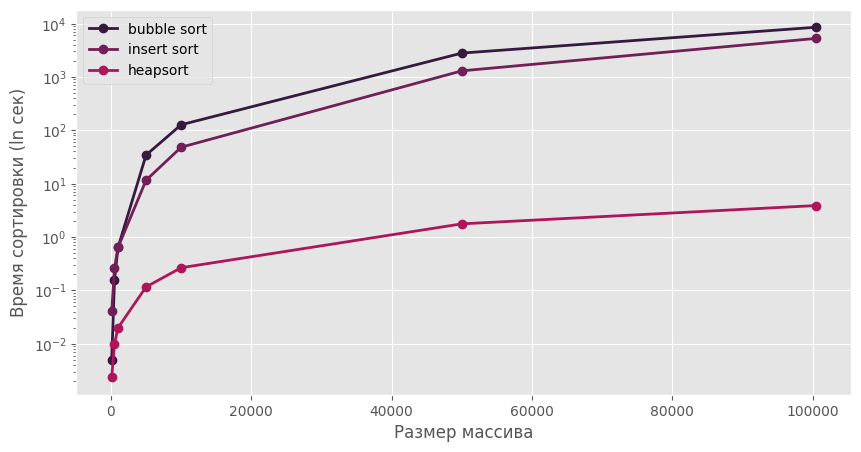

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100500], bubble_sort_time, label='bubble sort', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100500], insert_sort_time, label='insert sort', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100500], heapsort_time, label='heapsort', marker='o', linewidth=2)

plt.xlabel("Размер массива")
plt.ylabel("Время сортировки")
plt.yscale('log')

plt.legend()
plt.show()